### 读取数据

In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

filename = 'processed_study_001.nii'
# 加载NII数据
nii_data = nib.load('Data/'+filename)
ct_data = nii_data.get_fdata()

# 分割指定层的序号
layer_index = 10

# 分割指定层
slice_data=ct_data[:, :, layer_index]

### 显示单层

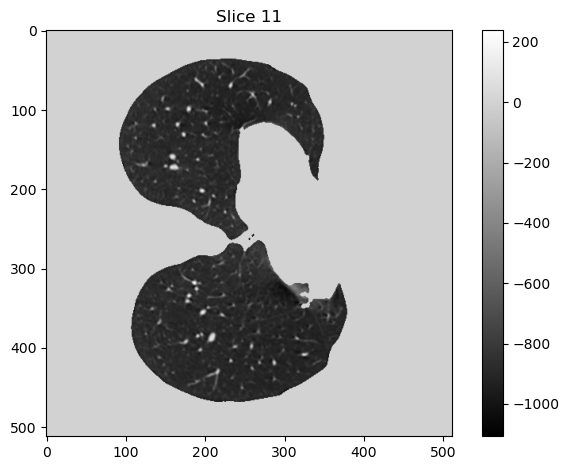

In [6]:
plt.imshow(slice_data, cmap='gray')
plt.colorbar()
plt.title('Slice {}'.format(layer_index+1))
plt.tight_layout()
plt.show()

### 肺泡及器官区域提取
利用聚类算法，尝试对数据进行分类

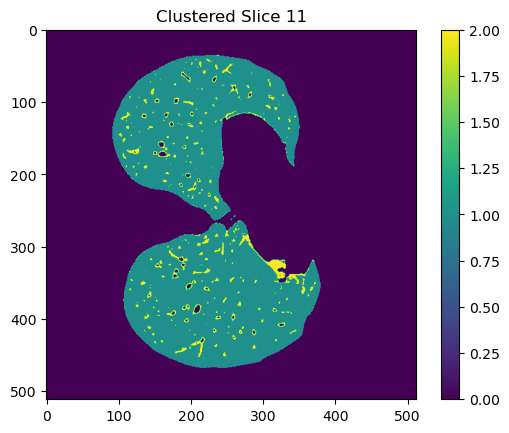

In [7]:
from sklearn.cluster import KMeans


# 标准化数据
normalized_slice_data = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data))

# 将二维数据转换为一维
flattened_slice_data = normalized_slice_data.flatten()

# 加载原始数据并处理NaN值
flattened_slice_data = np.nan_to_num(flattened_slice_data, nan=0)

# 应用K均值聚类
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(flattened_slice_data.reshape(-1, 1))

# 获取聚类标签
labels = kmeans.labels_

# 将聚类标签重塑回二维形状
clustered_slice_data = labels.reshape(normalized_slice_data.shape)

# 可视化聚类结果
plt.imshow(clustered_slice_data, cmap='viridis')
plt.colorbar()
plt.title('Clustered Slice {}'.format(layer_index+1))
plt.show()

### 提取肺部脂肪组织

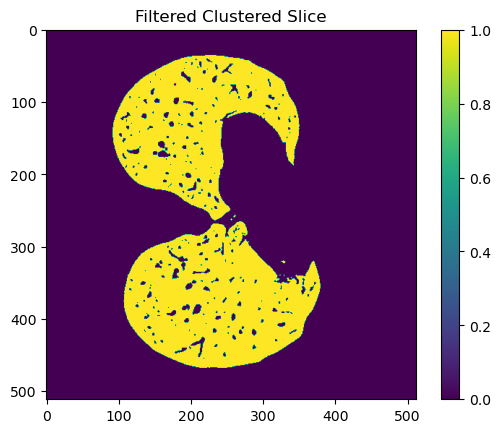

In [8]:
filtered_slice_data = np.where(clustered_slice_data == 2, 0, clustered_slice_data)

# 可视化过滤后的结果
plt.imshow(filtered_slice_data, cmap='viridis')
plt.colorbar()
plt.title('Filtered Clustered Slice')
plt.show()

### 应用mask到原始图像

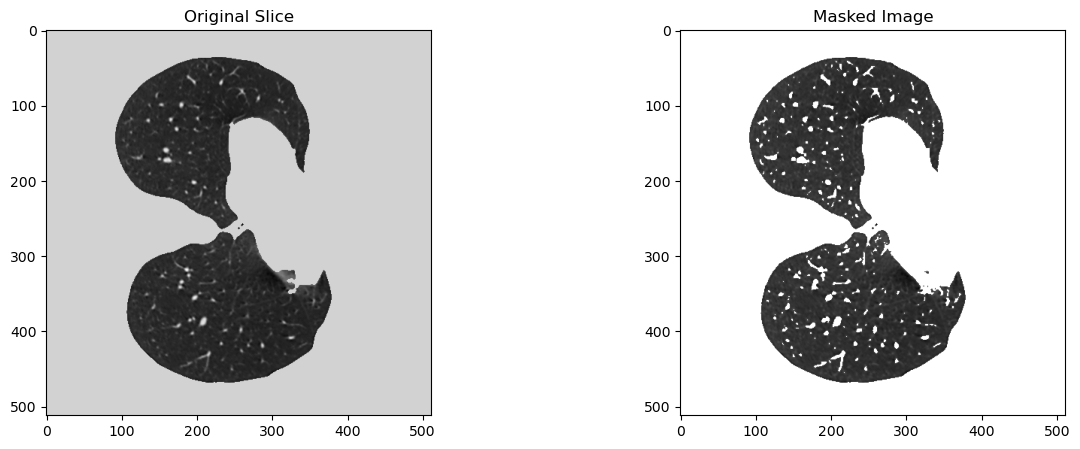

In [9]:
# 应用mask到原始图像
masked_image = np.where(filtered_slice_data, slice_data, 0)

# 可视化结果
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(slice_data, cmap='gray')
axs[0].set_title('Original Slice')

axs[1].imshow(masked_image, cmap='gray')
axs[1].set_title('Masked Image')
plt.show()